In [70]:
import numpy as np
import matplotlib.pyplot as plt
# Function to apply FGSM-like attack (adding uniform noise in one step)
def fgsm_attack(images, epsilon=0.12):
    noise = epsilon * np.sign(np.random.randn(*images.shape))
    adversarial_images = np.clip(images + noise, 0, 1)
    return adversarial_images

# Function to apply PGD-like attack (adding noise iteratively)
def pgd_attack(images, epsilon=0.2, alpha=0.02, iterations=20):
    adversarial_images = np.copy(images)
    for _ in range(iterations):
        noise = alpha * np.sign(np.random.randn(*images.shape))
        adversarial_images = np.clip(adversarial_images + noise, 0, 1)
    return adversarial_images

# Function to add Gaussian noise
def gaussian_noise_attack(images, mean=0, std=0.1):
    noise = np.random.normal(mean, std, images.shape)
    adversarial_images = np.clip(images + noise, 0, 1)
    return adversarial_images



In [1]:
from PIL import Image
import numpy as np

# Open the image
image = Image.open("panda.jpg")

# Convert to grayscale
#image_gray = image.convert("L")
# Resize to 28x28 pixels
image_resized = image.resize((612, 612))
# Convert to a NumPy array
image_array = np.array(image_resized)/255.0
print(image_array.shape)

(612, 612, 3)


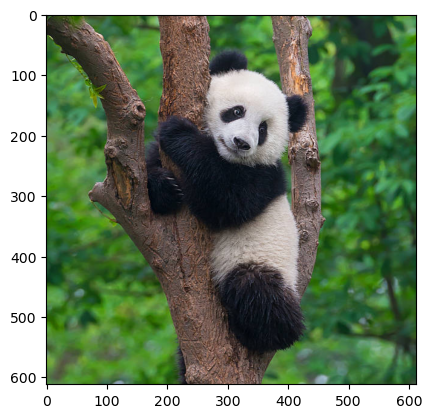

In [41]:
plt.imshow(image_array)

In [71]:
# Generate adversarial images
fgsm_images = fgsm_attack(image_array)
pgd_images = pgd_attack(image_array)
gaussian_images = gaussian_noise_attack(image_array)

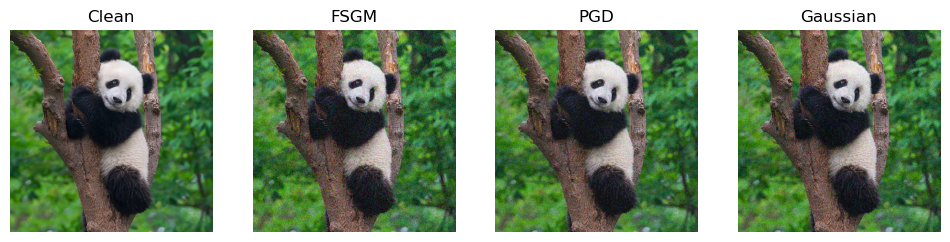

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 4 images stored in a list or numpy array
# For example, let's create random images for illustration
images = [image_array,fgsm_images,pgd_images,gaussian_images]  # 4 random 28x28 images
# Define titles for each column
titles = ['Clean', 'FSGM', 'PGD', 'Gaussian']
# Create a figure with 1 row and 4 columns
plt.figure(figsize=(12, 6))  # Adjust the figure size for better visibility

# Loop through the images and create subplots for each
for i, img in enumerate(images, 1):
    plt.subplot(1, 4, i)  # 1 row, 4 columns, index i
    plt.imshow(img)  # Display the image in grayscale
    plt.axis('off')  # Turn off axis labels
    plt.title(titles[i-1])  # Set title for each subplot

plt.show()
